type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
(6497, 13)


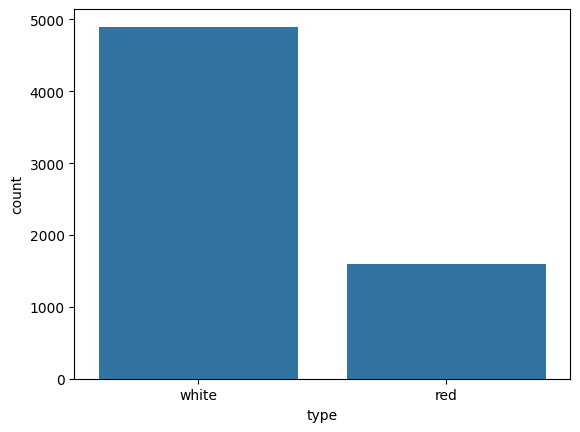

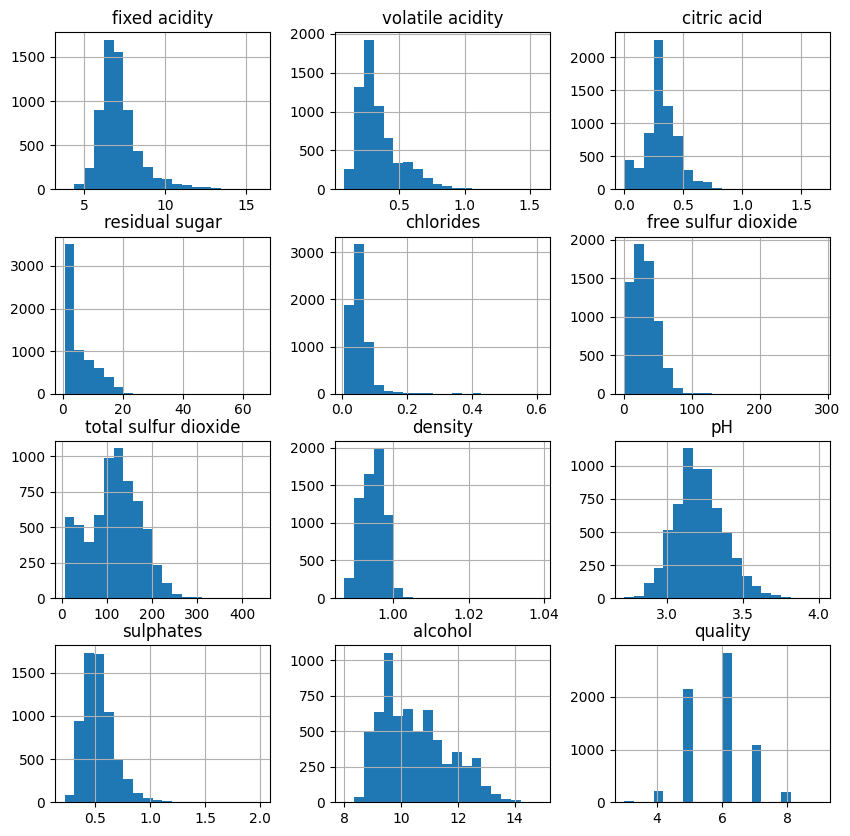

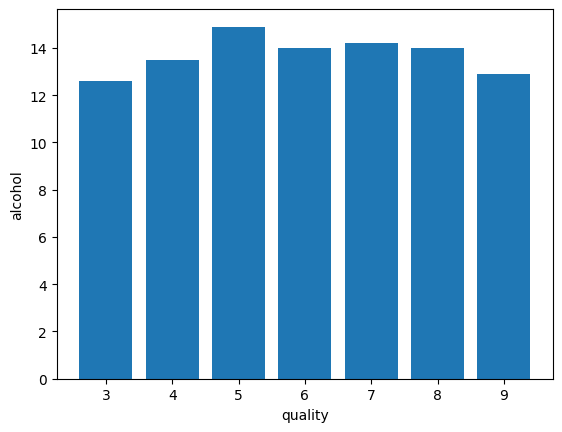

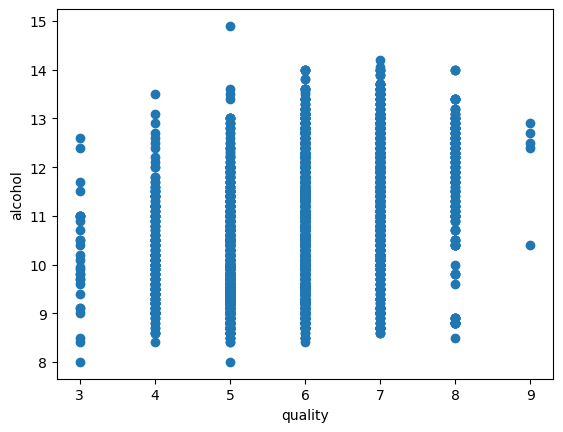

In [13]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the datasets
r = pd.read_csv('winequalityN.csv')

df = pd.DataFrame(r)

#checking for missing values
print(df.isnull().sum())

print(df.shape)

df.value_counts(df['type'])

#visualisation
sns.countplot(x='type', data=df)

df.hist(bins=20, figsize=(10, 10))
plt.show()

plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

plt.scatter(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()




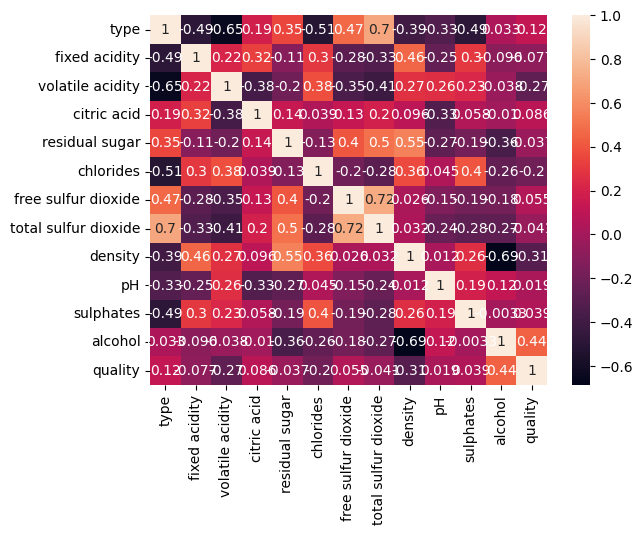

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
best quality           0
dtype: int64

In [14]:
#replacing categorical to numerical
df.replace({'white': 1, 'red': 0}, inplace=True)

sns.heatmap(df.corr(), annot=True)
plt.show()

df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
df = df.drop('total sulfur dioxide', axis = 1)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

df.isnull().sum()

In [15]:
#defining X and Y
X = df.drop('quality', axis=1)
Y = df['quality']

#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

model = LogisticRegression()
pca = PCA(n_components=2)

pca.fit(X)

X = pca.transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)


model.fit(X_train, Y_train)

#predicting the model
Y_pred = model.predict(X_test)


#checking accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy * 100)

76.53846153846153


In [16]:
#Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred) * 100)


77.8974358974359


In [17]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred) * 100)

82.2051282051282
